<a href="https://colab.research.google.com/github/minkyung10/class2022Spring/blob/main/scikit_learn%20-%20SL%3A%20regression%20(0330%20%EC%88%98%EC%97%85).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

iris 데이터를 가지고 regression, classification, dimensionality, clustering 다 할 수 있음

# Scikit-Learn for machine learning

### Understanding iris data

In [2]:
import seaborn as sns
df = sns.load_dataset('iris')   #iris 데이터 : 머신러닝에서 많이 사용하는 

In [3]:
type(df)      #데이터 타입: DataFrame

pandas.core.frame.DataFrame

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


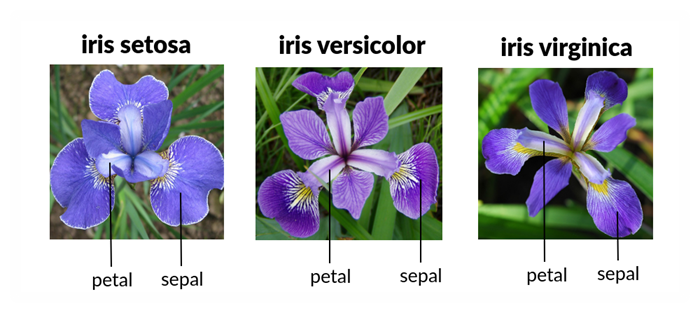

In [5]:
df   #총 150개 존재 . column 은 5개  : 총 150개의 밭에 있는 붓꽃을 채집한 것 / 3가지 종류의 붓꽃에 대해서 다룸

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


이 데이터를 기계에게 어떻게 학습시킬 수 있을까?

이 데이터를 통해서 supervised와 unsupervised 다 해볼 수 있음

1. 데이터 일부를 사용해서 regression 가능 (ex) petal length 가지고 petal width 예측하기

2. classification도 가능 (ex) species(category)가 결과로 나오도록 하기

3. dimensionality - sepal length & width / petal length &width 를 총 4차원으로 볼 때, 이거를 2차원으로 줄이기

4. clustering - 데이터를 주고 서로서로 뭉치게 만들어주는 것 (GMM 사용해서)

In [6]:
df['species'].unique()   #species column에 있는 데이터만 가지고 온다 + unique라는 함수를 입력하면 data 중에 unique한 값들만 가지고 온다

array(['setosa', 'versicolor', 'virginica'], dtype=object)

seaborn: statistical analysis에서 visualization을 해주는 프로그램

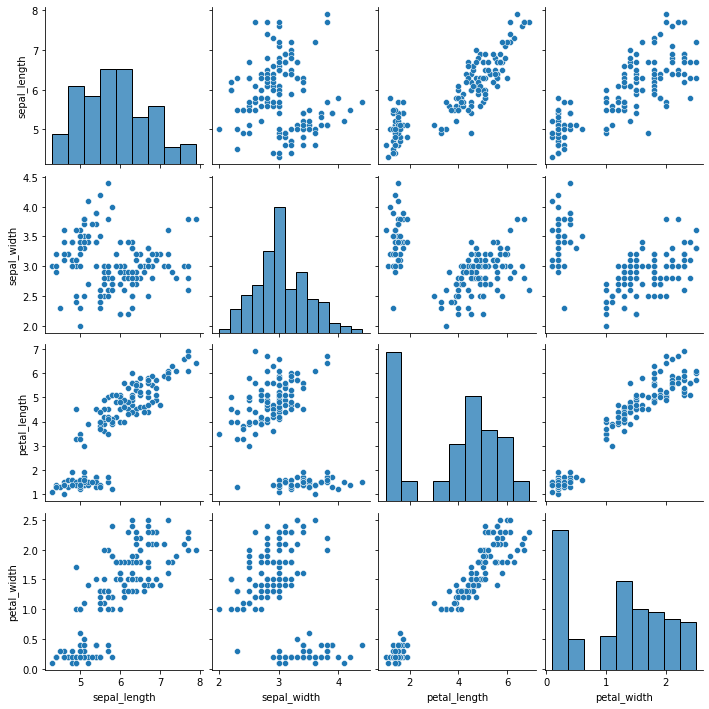

In [8]:
sns. pairplot (df)        #axis에 대한 label 다 되어 있음  - 4X4의 결과가 나옴
                          #대각선은 그냥 중복이 되는 부분 --> 히스토그램으로 나온다
                          #똑같은 데이터를 axis만 바꿔서 나오는 결과 존재

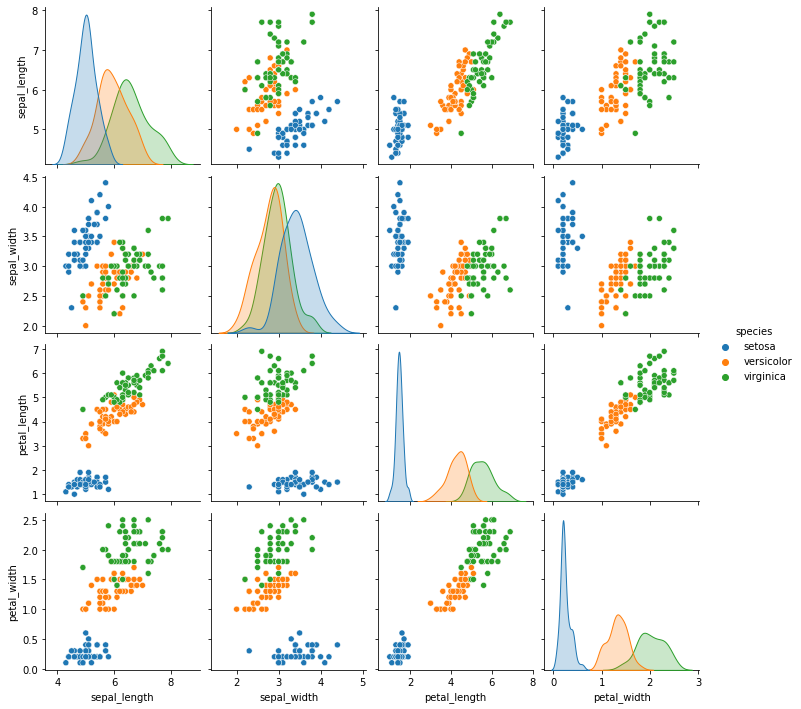

In [7]:
sns.pairplot(df, hue='species')    #species 정보까지 사용해서 나타내는 방법

<원하는 것만 가져오는 방법>

Text(0, 0.5, 'sepal_width')

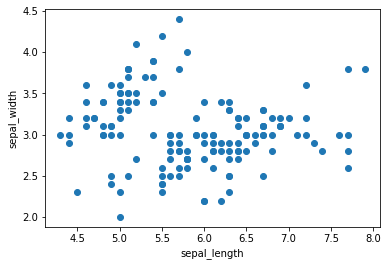

In [9]:
x = list(df['sepal_length'])    #이거에 해당하는 150개의 정보만 가져오는 것
y = list(df['sepal_width'])

import matplotlib.pyplot as plt      #x와 y가 짝을 이루고 있음 - 이를 바탕으로 평면에 점을 찍게됨 
plt.scatter(x, y);                   #총 150개의 점이 찍힌다
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

<setosa에 해당하는 값만 그리겠다>

Text(0.5, 1.0, 'setosa')

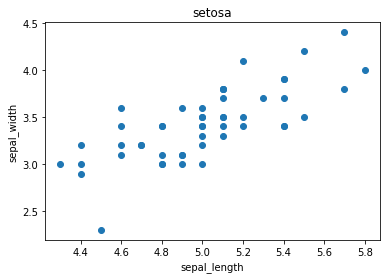

In [10]:
df_setosa = df[df['species']=='setosa']    #equal sign (==) 사용해서 원하는 값만 불러오기
                                           #df_setosa의 dimension이 어떻게 되는가? (50,5)
x = list(df_setosa['sepal_length'])        #이 50X5의 값중에서도 sepal length & width만 사용하겠다
y = list(df_setosa['sepal_width'])
plt.scatter(x, y);                         #위 그림중에서 일부만 선택되어서 나옴
plt.xlabel('sepal_length') 
plt.ylabel('sepal_width')
plt.title('setosa')

### Supervised learning: regression (linear regression)

regression - 숫자를 예측하는 것
함수가 뭐든 간데 숫자가 결과로 나오면 무조건 regression이다

linear regression - 대표적인 regression /
다른 예시 : logistic regression

linear regression : y=ax+b의 형태 (더하기랑 곱하기밖에 없는)

multiple linear regression : input 여러개일 수도 있음 (ex) y=ax1 + bx2 

이 외의 모든 함수 (지수함수, 로그함수, 사인함수, 이차함수, 삼차함수 등) 는 linear regression이 아니다

In [13]:
from sklearn.linear_model import LinearRegression    #install 필요 없다

In [14]:
model = LinearRegression(fit_intercept=True)        #intercept:y절편

In [15]:
import numpy as np
x = np.array(x)        #x, y는 미리 리스트로 만들었음 x: sepal length, y: sepal width
y = np.array(y)        #반드시 리스트를 array의 형태로 바꾸어 줘야 함

-> x와 y는 list에서 ndarray로 바뀌게 된다

In [18]:
x     #1d -> 그냥 50개의 값들이 있음

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. ])

In [19]:
x. shape

(50,)

In [17]:
print(type(x))

<class 'numpy.ndarray'>


x는 1d array인데 이것을 2d로 바꿔야 됨
왜냐하면 ; 이 모델이 2d array를 입력으로 받기 때문

...? multiple regression 할 가능성 있어서 2d로 바꾸는 거라고 ..? 
-> 확인해볼것...

In [27]:
X = x.reshape(50, 1)     #반드시 50x1의 행렬로 만들어 줘야 함
X.shape                  #50 자리에 -1 사용 가능 -> -1: 데이터에 맞춰서 알아서 만들어 줘라

(50, 1)

In [29]:
X

array([[5.1],
       [4.9],
       [4.7],
       [4.6],
       [5. ],
       [5.4],
       [4.6],
       [5. ],
       [4.4],
       [4.9],
       [5.4],
       [4.8],
       [4.8],
       [4.3],
       [5.8],
       [5.7],
       [5.4],
       [5.1],
       [5.7],
       [5.1],
       [5.4],
       [5.1],
       [4.6],
       [5.1],
       [4.8],
       [5. ],
       [5. ],
       [5.2],
       [5.2],
       [4.7],
       [4.8],
       [5.4],
       [5.2],
       [5.5],
       [4.9],
       [5. ],
       [5.5],
       [4.9],
       [4.4],
       [5.1],
       [5. ],
       [4.5],
       [4.4],
       [5. ],
       [5.1],
       [4.8],
       [5.1],
       [4.6],
       [5.3],
       [5. ]])

In [37]:
model.fit(X, y)

LinearRegression()

-> 이 model. fit 함수가 실행되는 순간, y=ax+b 함수가 구해진 것 / 이 a와 b 값이 estimate 된 것

a와 b 값을 구하는 것이 fit이다

y=ax+b -> regression model이다 : 입력에 대한 출력 숫자값을 예측해주는

In [32]:
model.coef_     #coef:계수 (기울기) -> a 값이 구해진다 / correlation:선이 그어졌을 때 값들이 그 선에 얼마나 집약되어 있는가

array([0.7985283])

correlation 값 -> r 값

r값이 클수록 상관관계가 크다

In [33]:
model.intercept_  #intercept: y절편 -> b 값이 구해진다

-0.569432673039648

In [34]:
xfit = np.linspace(4, 6)     

In [39]:
xfit   #linspace는 default가 50이어서 정해진 범위내에서 등분해서 50개의 값들을 만들어낸다

array([4.        , 4.04081633, 4.08163265, 4.12244898, 4.16326531,
       4.20408163, 4.24489796, 4.28571429, 4.32653061, 4.36734694,
       4.40816327, 4.44897959, 4.48979592, 4.53061224, 4.57142857,
       4.6122449 , 4.65306122, 4.69387755, 4.73469388, 4.7755102 ,
       4.81632653, 4.85714286, 4.89795918, 4.93877551, 4.97959184,
       5.02040816, 5.06122449, 5.10204082, 5.14285714, 5.18367347,
       5.2244898 , 5.26530612, 5.30612245, 5.34693878, 5.3877551 ,
       5.42857143, 5.46938776, 5.51020408, 5.55102041, 5.59183673,
       5.63265306, 5.67346939, 5.71428571, 5.75510204, 5.79591837,
       5.83673469, 5.87755102, 5.91836735, 5.95918367, 6.        ])

In [40]:
Xfit = xfit.reshape(-1, 1)   #2d array로 reshape - model 함수가 2d array만 입력으로 받기 때문
yfit = model.predict(Xfit)   #a와 b값이 정해진 만들어진 모델에다가 x를 넣어서 predict

-> 이렇게 되면 Xfit (50,1) - 2d array
// yfit (50,) - 1d array

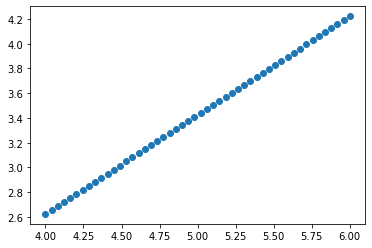

In [42]:
plt. scatter (xfit, yfit)

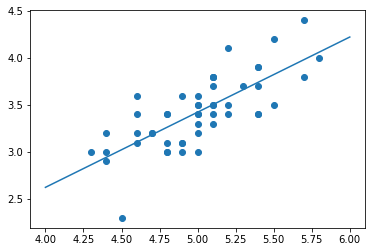

In [36]:
plt.scatter(x, y)               #linear regression - 데이터들을 관통하는 선을 긋는 것
                                #x에 숫자 넣으면 y값으로 숫자가 나오는
                                #y=ax+b 에 해당하는 직선을 만들고 싶은 것
plt.plot(xfit, yfit);

correlation 값: 0에 가까우면 상관관계 적고, 1에 가까울수록 상관관계가 큼

In [38]:
df_setosa.corr()      #correatlion 값 구하는 

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.742547,0.267176,0.278098
sepal_width,0.742547,1.000000,0.177700,0.232752
petal_length,0.267176,0.177700,1.000000,0.331630
petal_width,0.278098,0.232752,0.331630,1.000000


#### gradio implementation - gradio 사용에서 예측 시스템 만들기

In [ ]:
!pip install gradio
import gradio as gr

def test (x):
  X = np.array(x).reshape(-1,1)
  y = model.predict(X)
  return y[0]

iface = gr.Interface(test, inputs = ["number"], outputs = ["text"])
iface.launch(debug=True)

### Supervised learning: classification (Naive Bayes)

classificatoin: 카테고리를 인식하는 것

다른 예시 : NN

In [ ]:
x = df.drop('species', axis=1) # axis = 0 (delete row) / 1 (delete column)
x.shape

In [ ]:
y = df['species']
y.shape

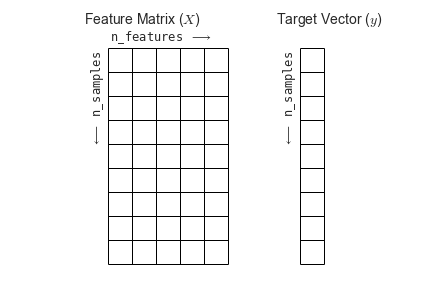

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y)

In [ ]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
yout = model.predict(Xtest)                # 4. predict on new data

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, yout)

#### gradio implementation

In [ ]:
import pandas as pd
def test (in1, in2, in3, in4):
  data = {'sepal_length': [in1],
        'sepal_width': [in2],
        'petal_length': [in3],
        'petal_width': [in4]}
  Xtest = pd.DataFrame(data)
  yout = model.predict(Xtest)
  return yout

iface = gr.Interface(test, inputs = ["number", "number", "number", "number"], outputs = ["text"])
iface.launch()

### Unsupervised learning: dimensionality 

---

(PCA) 

PCA - Principal Component Analysis

---


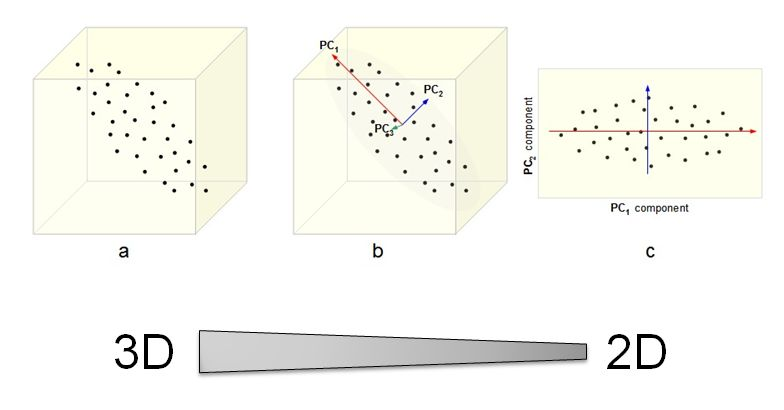

In [ ]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(x)                           # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(x)  

In [ ]:
df['PCA1'] = X_2D[:, 0]
df['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=df, fit_reg=False);

### Unsupervised learning: clustering (GMM)

GMM - Gaussian Mixture Model

https://raw.githubusercontent.com/angeloyeo/angeloyeo.github.io/master/pics/2021-02-08-GMM_and_EM/pic1.mp4

In [ ]:
from sklearn.mixture import GaussianMixture as GMM   # 1. Choose the model class
model = GMM(n_components=3, covariance_type='full')  # 2. Instantiate the model with hyperparameters
model.fit(x)                                         # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(x)                             # 4. Determine cluster labels

In [ ]:
y_gmm

In [ ]:
df['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=df, hue='species', col='cluster', fit_reg=False);